In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

df_original = pd.read_csv('C:/csv/traffic_accidents.csv')

relevant_columns = [
    'most_severe_injury', 'weather_condition', 'lighting_condition', 'first_crash_type',
    'trafficway_type', 'alignment', 'roadway_surface_cond', 'road_defect', 'crash_type',
    'damage', 'prim_contributory_cause', 'num_units', 'injuries_total', 'crash_hour',
    'crash_day_of_week', 'crash_month'
]
df_relevant = df_original[relevant_columns]

numeric_cols = df_relevant.select_dtypes(include=['number']).columns
categorical_cols = df_relevant.select_dtypes(include=['object']).columns

for col in numeric_cols:
    df_relevant.loc[:, col] = df_relevant[col].fillna(df_relevant[col].mean())

for col in categorical_cols:
    df_relevant.loc[:, col] = df_relevant[col].fillna(df_relevant[col].mode()[0])

print("Unique values after preprocessing:", df_relevant['most_severe_injury'].unique())

Unique values after preprocessing: ['NO INDICATION OF INJURY' 'NONINCAPACITATING INJURY'
 'INCAPACITATING INJURY' 'REPORTED, NOT EVIDENT' 'FATAL']


In [2]:
label_encoder = LabelEncoder()
y_numeric = label_encoder.fit_transform(df_relevant['most_severe_injury'])

print("Unique values in the numeric target variable:", np.unique(y_numeric))

Unique values in the numeric target variable: [0 1 2 3 4]


In [3]:
X = df_relevant.drop('most_severe_injury', axis=1)  
y = y_numeric 

categorical_cols = [col for col in X.columns if X[col].dtype == 'object']
print("Categorical columns:", categorical_cols)

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder.fit(X[categorical_cols])
X_encoded = encoder.transform(X[categorical_cols])

X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_cols))

X_numeric = pd.concat([X.drop(categorical_cols, axis=1).reset_index(drop=True), X_encoded_df.reset_index(drop=True)], axis=1)

print("Shape of numeric features (X_numeric):", X_numeric.shape)

Categorical columns: ['weather_condition', 'lighting_condition', 'first_crash_type', 'trafficway_type', 'alignment', 'roadway_surface_cond', 'road_defect', 'crash_type', 'damage', 'prim_contributory_cause']
Shape of numeric features (X_numeric): (209306, 126)


In [4]:
y_categorical = y.astype(int)

X_array = X_numeric.values
y_array = y_categorical  

print("Shape of features (X_array):", X_array.shape)
print("Shape of target variable (y_array):", y_array.shape)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_array, y_array)

print("Unique values in the resampled target variable (y_resampled):", np.unique(y_resampled))

Shape of features (X_array): (209306, 126)
Shape of target variable (y_array): (209306,)
Unique values in the resampled target variable (y_resampled): [0 1 2 3 4]


In [5]:
print("Shape of features (X_resampled):", X_resampled.shape)
print("Shape of target variable (y_resampled):", y_resampled.shape)

Shape of features (X_resampled): (773945, 126)
Shape of target variable (y_resampled): (773945,)


In [6]:
try:
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
    print("Train and test sets successfully split.")
except Exception as e:
    print("Error during train-test split:", e)

Train and test sets successfully split.


In [7]:
clf = RandomForestClassifier()

clf.fit(X_train, y_train)

RandomForestClassifier()

In [8]:
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

print("Classification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 0.9557978926151083
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     30843
           1       0.96      0.96      0.96     31039
           2       1.00      1.00      1.00     30861
           3       0.91      0.90      0.90     31191
           4       0.92      0.92      0.92     30855

    accuracy                           0.96    154789
   macro avg       0.96      0.96      0.96    154789
weighted avg       0.96      0.96      0.96    154789



ROC-AUC Score: 0.9966830490542853


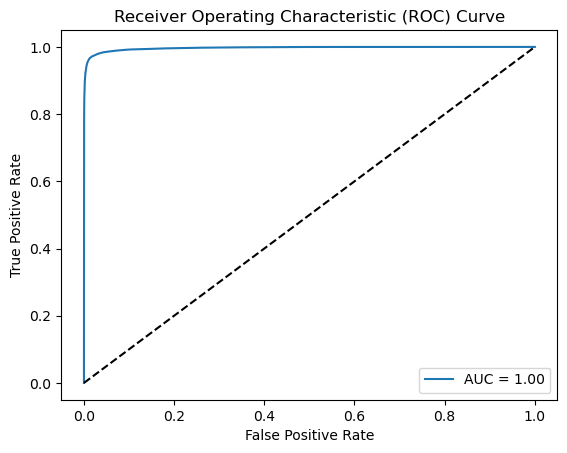

In [9]:
y_test_binary = (y_test == 1).astype(int)
y_pred_proba_binary = clf.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test_binary, y_pred_proba_binary, pos_label=1)
roc_auc = roc_auc_score(y_test_binary, y_pred_proba_binary)
print("ROC-AUC Score:", roc_auc)

plt.plot(fpr, tpr, label="AUC = %0.2f" % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

Feature ranking:
1. Feature 1 (0.15618326908265406)
2. Feature 2 (0.0794980423929711)
3. Feature 4 (0.0732535489995426)
4. Feature 3 (0.06275792179080242)
5. Feature 82 (0.06165124098139777)
6. Feature 81 (0.04859140902628094)
7. Feature 0 (0.025792059327881648)
8. Feature 32 (0.025605500966933543)
9. Feature 49 (0.021292518175378475)
10. Feature 47 (0.02081448544758608)
11. Feature 104 (0.020092564771147278)
12. Feature 122 (0.018694737769812824)
13. Feature 23 (0.01834483504459308)
14. Feature 40 (0.01807312434108427)
15. Feature 33 (0.016491665503407183)
16. Feature 43 (0.01611349316848041)
17. Feature 92 (0.015679214795539843)
18. Feature 85 (0.014890552794907063)
19. Feature 18 (0.012224765115444807)
20. Feature 75 (0.011371512091323779)
21. Feature 79 (0.011019486944593801)
22. Feature 67 (0.010980233112145698)
23. Feature 84 (0.010954094975023438)
24. Feature 20 (0.01065685877482129)
25. Feature 7 (0.010555409351815887)
26. Feature 25 (0.009454395453869838)
27. Feature 83 (0.009

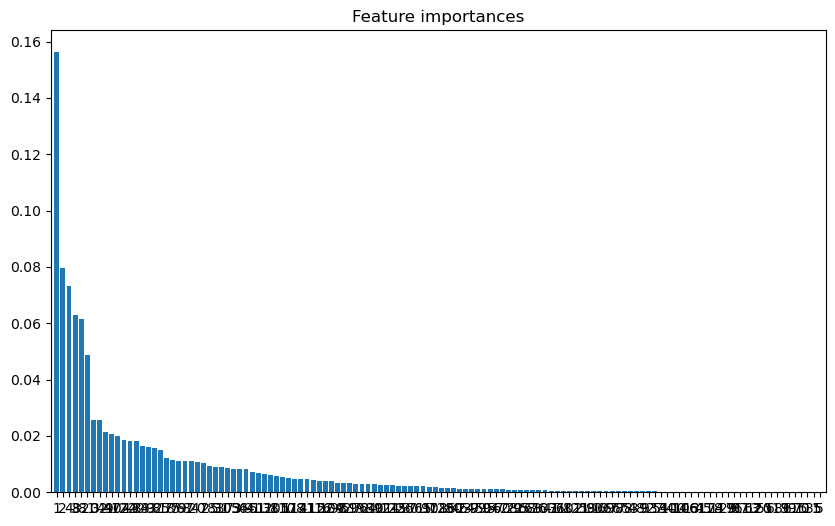

In [14]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X_train.shape[1]):
    print(f"{f + 1}. Feature {indices[f]} ({importances[indices[f]]})")

plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

models = {
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'Neural Network': MLPClassifier()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.4f}")

Random Forest Accuracy: 0.9553


In [68]:
import joblib
joblib.dump(optimized_clf, 'accident_severity_model.pkl')
print("Model saved successfully.")

Model saved successfully.


In [115]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import joblib

# Manually create a small subset of data to simulate X_train
data = {
    'lighting_condition': [1, 0, 3],
    'weather_condition': [1, 2, 1],
    'road_surface': [0, 1, 1],
    'road_type': [4, 4, 4],
    'first_crash_type': [2, 1, 2],
    'injuries_total': [1, 0, 3],
    'crash_hour': [3, 2, 1],
    'crash_day_of_week': [0, 2, 3],
    'crash_month': [5, 7, 12]
}
df_sample = pd.DataFrame(data)

# Manually create the target variable
target_sample = [1, 0, 1]

# Standardize the features
scaler = StandardScaler()
X_train_sample = scaler.fit_transform(df_sample)

# Save the fitted scaler (if not already saved)
joblib.dump(scaler, 'scaler.pkl')
print("Scaler saved successfully.")

Scaler saved successfully.


In [117]:
# Load the trained model
model = joblib.load('accident_severity_model.pkl')
print("Model loaded successfully.")

# Load the scaler
scaler = joblib.load('scaler.pkl')
print("Scaler loaded successfully.")

Model loaded successfully.
Scaler loaded successfully.
